In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as py
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\SS\Downloads\MDS Course files\Data set\cell.csv")

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


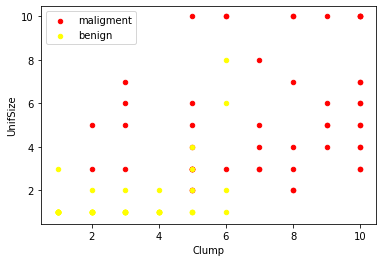

In [8]:
ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Red',label='maligment')

df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label = "benign", ax=ax)

plt.show()

In [9]:
df.nunique()

ID             645
Clump           10
UnifSize        10
UnifShape       10
MargAdh         10
SingEpiSize     10
BareNuc         11
BlandChrom      10
NormNucl        10
Mit              9
Class            2
dtype: int64

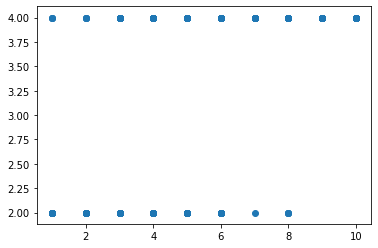

In [10]:
plt.scatter(df.Clump, df.Class)
plt.show()

In [11]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [12]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

df['BareNuc']=df['BareNuc'].astype('int') # To convert object to int type

df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [20]:
df.shape

(683, 11)

In [21]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [22]:
x=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [23]:
y=df['Class'].values
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)
print(f"train set: {xtrain.shape}  and {ytrain.shape}")
print(f"test set: {xtest.shape}  and {ytest.shape}")

train set: (546, 9)  and (546,)
test set: (137, 9)  and (137,)


In [25]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
ypred=clf.predict(xtest)
ypred[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

In [31]:
df12=pd.DataFrame({'actual':ytest,'predicted':ypred})
df12.head()

,actual,predicted
0,2,2
1,4,4
2,2,2
3,4,4
4,2,2


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
confusion_matrix(ytest,ypred)

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

